In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Drive 상의 프로젝트 경로
project_root = "/content/drive/MyDrive/chest_project"
os.makedirs(project_root, exist_ok=True)

# 작업 경로 이동
%cd {project_root}

/content/drive/MyDrive/chest_project


In [ ]:
# 📌 fastai 설치 (최초 1회만)
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 


🔍 Training with: resnet18


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.461259,0.518951,0.875000,13:38


epoch,train_loss,valid_loss,accuracy,time
0,0.194792,0.513853,0.875000,01:55



🔍 Training with: resnet34


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 167MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.465869,0.286005,0.875000,01:55


epoch,train_loss,valid_loss,accuracy,time
0,0.173271,0.086415,1.000000,01:51



🔍 Training with: resnet50


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.507255,1.651253,0.625000,02:23


epoch,train_loss,valid_loss,accuracy,time
0,0.219237,0.499387,0.687500,01:55



🔍 Training with: densenet121


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 173MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.434366,0.165478,0.937500,02:04


epoch,train_loss,valid_loss,accuracy,time
0,0.160215,1.190414,0.750000,02:01



🔍 Training with: efficientnet_b0


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 165MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.487389,0.078745,0.937500,02:16


epoch,train_loss,valid_loss,accuracy,time
0,0.274608,0.165993,0.937500,01:50



📊 Validation Accuracy (after 1 epoch):
resnet34: 1.0000
efficientnet_b0: 0.9375
resnet18: 0.8750
densenet121: 0.7500
resnet50: 0.6875


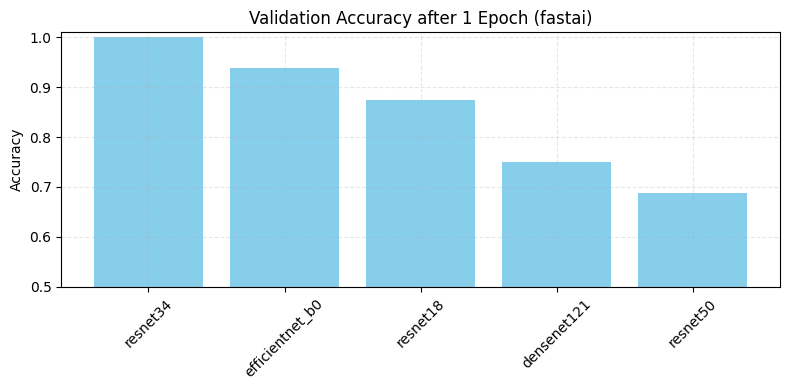

In [ ]:
# ------------------------------
# ✅ 라이브러리 임포트
# ------------------------------
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------
# ✅ 데이터 경로 설정
# ------------------------------
data_path = Path("/content/drive/MyDrive/chest_project/chest_xray/chest_xray")

# ------------------------------
# ✅ DataLoader 구성 함수
# ------------------------------
def get_dataloaders(path, img_size=224, batch_size=64):
    dls = ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='val',
        valid_pct=None,
        seed=42,
        item_tfms=Resize(img_size),
        batch_tfms=aug_transforms(do_flip=True),
        bs=batch_size
    )
    return dls

# ------------------------------
#  비교할 사전학습 백본 모델 리스트
# ------------------------------
model_archs = [resnet18, resnet34, resnet50, densenet121, efficientnet_b0]

# ------------------------------
#  모델별 1 에포크 학습 및 성능 기록
# ------------------------------
results = {}

for arch in model_archs:
    print(f"\n🔍 Training with: {arch.__name__}")

    dls = get_dataloaders(data_path)
    learn = vision_learner(dls, arch, metrics=accuracy)

    learn.fine_tune(1)  # 핵심: 1 에포크만 학습

    val_acc = learn.validate()[1]
    results[arch.__name__] = val_acc

    learn.export(f"{arch.__name__}_1epoch.pkl")  # 결과 저장

# ------------------------------
# ✅ 결과 출력 및 시각화
# ------------------------------
print("\n📊 Validation Accuracy (after 1 epoch):")
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")

# Bar Chart 시각화
plt.figure(figsize=(8, 4))
plt.bar([x[0] for x in sorted_results], [x[1] for x in sorted_results], color='skyblue')
plt.title("Validation Accuracy after 1 Epoch (fastai)")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.01)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()